<a href="https://colab.research.google.com/github/rohamvo/LOL-data-analysis/blob/main/Win_Lose_Factor_Analysis_Using_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 


In [ ]:
chall_t1 = pd.read_csv("/content/drive/MyDrive/3조_XXXX/04. 기타자료/데이터셋/chall_match_total_golds_t1_df")
chall_t2 = pd.read_csv("/content/drive/MyDrive/3조_XXXX/04. 기타자료/데이터셋/chall_match_total_golds_t2_df")
gm_t1 =pd.read_csv("/content/drive/MyDrive/3조_XXXX/04. 기타자료/데이터셋/gm_match_total_golds_t1_df")
gm_t2 = pd.read_csv("/content/drive/MyDrive/3조_XXXX/04. 기타자료/데이터셋/gm_match_total_golds_t2_df")
diamond_t1 =pd.read_csv("/content/drive/MyDrive/3조_XXXX/04. 기타자료/데이터셋/diamond_match_total_golds_t1_df")
diamond_t2 =pd.read_csv("/content/drive/MyDrive/3조_XXXX/04. 기타자료/데이터셋/diamond_match_total_golds_t2_df")

In [ ]:
chall_t1 = chall_t1.drop('Unnamed: 0', axis=1)

In [ ]:
chall_t1

In [ ]:
chall_t1['합계'] = chall_t1.sum(axis=1)


In [ ]:
chall_t2 = chall_t2.drop('Unnamed: 0', axis=1)
chall_t2['합계2'] = chall_t2.sum(axis=1)
chall_t2

In [ ]:
chall_t2

In [ ]:
chall_gold =pd.concat([chall_t1,chall_t2], axis=1)

In [ ]:
chall_gold['15분골드차이'] = chall_gold['합계'] - chall_gold['합계2']

In [ ]:
chall_gold

In [ ]:
chall_winlose=pd.read_csv("/content/drive/MyDrive/3조_XXXX/04. 기타자료/데이터셋/chall_winlose_df")

In [ ]:
chall_winlose =chall_winlose.drop('Unnamed: 0', axis=1)
chall_winlose

##15분골드 차이 회귀분석

In [ ]:
chall_winlose.columns = ['1팀','2팀']
chall_winlose

In [ ]:
chall_winlose["1팀"] = chall_winlose["1팀"].astype(int)

In [ ]:
chall_winlose["2팀"] = chall_winlose["2팀"].astype(int)

In [ ]:
chall_winlose2 = chall_winlose['2팀'].apply(lambda x : x * 2)

In [ ]:
chall_winlose['2팀'] = chall_winlose2

In [ ]:
chall_winlose

In [ ]:
chall_gold= pd.concat([chall_gold, chall_winlose], axis=1)
chall_gold

In [ ]:
chall_gold = chall_gold.drop(['0','1','2','3','4'], axis =1)

In [ ]:
chall_gold['승리'] = chall_gold['1팀'] + chall_gold['2팀']
chall_gold

In [ ]:
chall_gold = chall_gold.drop(['1팀','2팀'], axis =1 )
chall_gold = chall_gold.dropna()

In [ ]:
chall_gold

In [ ]:
chall_gold = chall_gold.astype(int)

In [ ]:
col_names = ["15분골드차이", "승리"]
df=chall_gold[col_names]

In [ ]:
X=df['15분골드차이'].values.reshape(-1,1)
y=df['승리'].values.reshape(-1,1)


In [ ]:
df

In [ ]:
X.shape, y.shape

((97, 1), (97, 1))

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X,y)
plt.xlabel('15분골드차이')
plt.ylabel('승리')

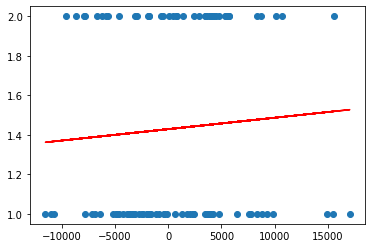

In [ ]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(X,y)
y_pred= lr.predict(X)
plt.scatter(X,y)
plt.plot(X,y_pred, color='red')

###그마 15분 골드 차이 전처리리

In [ ]:
gm_t2 = gm_t2.drop('Unnamed: 0', axis=1)
gm_t2['합계2'] = gm_t2.sum(axis=1)
gm_t2

,0,1,2,3,4,합계2
0,6744,5734,6055,4896,3328,26757
1,4350,4676,5595,6965,5122,26708
2,5329,6224,7014,6848,5216,30631
3,5796,7100,7191,6700,5273,32060
4,3923,6054,5482,7116,3632,26207
...,...,...,...,...,...,...
1510,5391,6192,8516,5493,5023,30615
1511,4339,5716,4822,8023,4594,27494
1512,6938,7712,4736,5760,4748,29894
1513,6916,7537,6988,5906,4255,31602


In [ ]:
gm_t1 = gm_t1.drop('Unnamed: 0', axis=1)
gm_t1['합계1'] = gm_t1.sum(axis=1)
gm_t1

,0,1,2,3,4,합계1
0,5028,6225,6076,5814,4788,27931
1,6281,7093,4716,5251,4398,27739
2,6295,5496,5047,6312,4300,27450
3,5712,6492,5543,6908,4737,29392
4,5252,4943,4855,5738,3909,24697
...,...,...,...,...,...,...
1510,6594,6100,5476,6607,4040,28817
1511,4560,6649,5737,4280,3771,24997
1512,6650,8087,5036,4855,4719,29347
1513,4760,5156,4947,4549,4058,23470


In [ ]:
gm_gold =pd.concat([gm_t1, gm_t2], axis=1)

In [ ]:
#gm_gold = gm_gold.drop(['0','1','2','3','4'], axis =1)
gm_gold['15분골드차이'] = gm_gold['합계1'] - gm_gold['합계2']
gm_gold

,0,1,2,3,4,합계1,0,1,2,3,4,합계2,15분골드차이
0,5028,6225,6076,5814,4788,27931,6744,5734,6055,4896,3328,26757,1174
1,6281,7093,4716,5251,4398,27739,4350,4676,5595,6965,5122,26708,1031
2,6295,5496,5047,6312,4300,27450,5329,6224,7014,6848,5216,30631,-3181
3,5712,6492,5543,6908,4737,29392,5796,7100,7191,6700,5273,32060,-2668
4,5252,4943,4855,5738,3909,24697,3923,6054,5482,7116,3632,26207,-1510
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1510,6594,6100,5476,6607,4040,28817,5391,6192,8516,5493,5023,30615,-1798
1511,4560,6649,5737,4280,3771,24997,4339,5716,4822,8023,4594,27494,-2497
1512,6650,8087,5036,4855,4719,29347,6938,7712,4736,5760,4748,29894,-547
1513,4760,5156,4947,4549,4058,23470,6916,7537,6988,5906,4255,31602,-8132


In [ ]:
gm_winlose_df= pd.read_csv("/content/drive/MyDrive/3조_XXXX/04. 기타자료/데이터셋/gm_winlose_df")

In [ ]:
gm_winlose_df = gm_winlose_df.drop('Unnamed: 0', axis=1)
gm_winlose_df

,0,1
0,False,True
1,True,False
2,False,True
3,False,True
4,False,True
...,...,...
1535,False,True
1536,False,True
1537,True,False
1538,False,True


In [ ]:
gm_winlose_df.columns = ['1팀','2팀']

gm_winlose_df["1팀"] = gm_winlose_df["1팀"].astype(int)
gm_winlose_df["2팀"] = gm_winlose_df["2팀"].astype(int)
gm_winlose_df2 = gm_winlose_df['2팀'].apply(lambda x : x * 2)
gm_winlose_df['2팀'] = gm_winlose_df2
gm_winlose_df

,1팀,2팀
0,0,2
1,1,0
2,0,2
3,0,2
4,0,2
...,...,...
1535,0,2
1536,0,2
1537,1,0
1538,0,2


In [ ]:
gm_gold= pd.concat([gm_gold, gm_winlose_df], axis=1)
gm_gold

,0,1,2,3,4,합계1,0,1,2,3,4,합계2,15분골드차이,1팀,2팀
0,5028.0,6225.0,6076.0,5814.0,4788.0,27931.0,6744.0,5734.0,6055.0,4896.0,3328.0,26757.0,1174.0,0,2
1,6281.0,7093.0,4716.0,5251.0,4398.0,27739.0,4350.0,4676.0,5595.0,6965.0,5122.0,26708.0,1031.0,1,0
2,6295.0,5496.0,5047.0,6312.0,4300.0,27450.0,5329.0,6224.0,7014.0,6848.0,5216.0,30631.0,-3181.0,0,2
3,5712.0,6492.0,5543.0,6908.0,4737.0,29392.0,5796.0,7100.0,7191.0,6700.0,5273.0,32060.0,-2668.0,0,2
4,5252.0,4943.0,4855.0,5738.0,3909.0,24697.0,3923.0,6054.0,5482.0,7116.0,3632.0,26207.0,-1510.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2
1536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2
1537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
1538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2


In [ ]:
gm_gold['승리'] = gm_gold['1팀'] + gm_gold['2팀']
col_names = ["15분골드차이", "승리"]
gm_df=gm_gold[col_names]
gm_df = gm_df.dropna()

In [ ]:
gm_df

,15분골드차이,승리
0,1174.0,2
1,1031.0,1
2,-3181.0,2
3,-2668.0,2
4,-1510.0,2
...,...,...
1510,-1798.0,2
1511,-2497.0,1
1512,-547.0,2
1513,-8132.0,1


In [ ]:
X=gm_df['15분골드차이'].values.reshape(-1,1)
y=gm_df['승리'].values.reshape(-1,1)


In [ ]:
X.shape

(1515, 1)

###다이아몬드드 15분 골드차이 전처리

In [ ]:
diamond_t2 = diamond_t2.drop('Unnamed: 0', axis=1)
diamond_t2['합계2'] = diamond_t2.sum(axis=1)
diamond_t2

In [ ]:
diamond_t1 = diamond_t1.drop('Unnamed: 0', axis=1)
diamond_t1['합계'] = diamond_t1.sum(axis=1)
diamond_t1

,0,1,2,3,4,합계
0,4308,3997,5256,3520,6324,23405
1,6193,4470,4527,6141,3941,25272
2,4237,7909,7969,6504,5260,31879
3,4974,9309,7376,8587,4514,34760
4,4547,4032,5085,4419,3555,21638
...,...,...,...,...,...,...
2209,5609,6540,5183,6401,5679,29412
2210,4192,5851,6624,5793,4054,26514
2211,8297,6464,6169,5366,4530,30826
2212,5893,4736,6419,5546,5272,27866


In [ ]:
diamond_gold =pd.concat([diamond_t1, diamond_t2], axis=1)

In [ ]:
diamond_gold = diamond_gold.drop(['0','1','2','3','4'], axis =1)

In [ ]:
diamond_gold['15분골드차이'] = diamond_gold['합계'] - diamond_gold['합계2']

<ipython-input-10-6bcbb148c9c5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diamond_gold['15분골드차이'] = diamond_gold['합계'] - diamond_gold['합계2']


In [ ]:
diamond_gold

,합계,합계2,15분골드차이
0,23405,31552,-8147
1,25272,27958,-2686
2,31879,25098,6781
3,34760,30291,4469
4,21638,34015,-12377
...,...,...,...
2209,29412,25621,3791
2210,26514,30620,-4106
2211,30826,26196,4630
2212,27866,31828,-3962


In [ ]:
diamond_winlose_df= pd.read_csv("/content/drive/MyDrive/3조_XXXX/04. 기타자료/데이터셋/diamond_match_winlose_last_df.csv")

In [ ]:
diamond_winlose_df

,Unnamed: 0,0,1
0,0,False,True
1,1,False,True
2,2,True,False
3,3,True,False
4,4,False,True
...,...,...,...
44195,44195,False,True
44196,44196,False,True
44197,44197,True,False
44198,44198,False,True


##*분석*

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    gm_gold.drop( "승리", axis=1),
    df['승리'],
    random_state=42
)

In [ ]:
# machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
def score(res):
    return round(res * 100, 2)

In [ ]:
model_lgr = LogisticRegression()
model_lgr.fit(X, y)
score_lgr = score(model_lgr.score(X, y))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
model_rf = RandomForestClassifier()
model_rf.fit(X, y)
score_rf = score(model_rf.score(X, y))

<ipython-input-62-99fb72b6f516>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(X, y)


In [ ]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X, y)
score_dt = score(model_dt.score(X, y))

In [ ]:
model_nb = GaussianNB()
model_nb.fit(X, y)
score_nb = score(model_nb.score(X, y))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
models = pd.DataFrame({
    "model": ["Logistic regression", "Random forest", "Decision tree"],
    "score": [score_lgr, score_rf, score_dt, score_nb]
})
models.sort_values(by = "score", ascending = False)

,model,score
1,Random forest,96.91
2,Decision tree,96.91
0,Logistic regression,58.76
3,Naive Bayes classifier,56.70


###모델 테스트

In [ ]:
X_test

In [ ]:
y_pred = model_rf.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [ ]:
submission = pd.DataFrame({
    "15분골드차이": X_test["15분골드차이"],
    "승리": y_pred
})

submission.to_csv("submission.csv", index = False)

In [ ]:
submission = pd.read_csv("submission.csv")
submission.head()

,15분골드차이,승리
0,4798,2
1,-7808,2
2,3475,1
3,-3059,1
4,-833,1


##그마 모델 테스트

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    gm_df.drop( "승리", axis=1),
    gm_df['승리'],
    random_state=42
)

In [ ]:
X_train.shape, X_test.shape

((1136, 1), (379, 1))

In [ ]:
model_lgr = LogisticRegression()
model_lgr.fit(X, y)
score_lgr = score(model_lgr.score(X, y))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
model_rf = RandomForestClassifier()
model_rf.fit(X, y)
score_rf = score(model_rf.score(X, y))

<ipython-input-55-99fb72b6f516>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(X, y)


In [ ]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X, y)
score_dt = score(model_dt.score(X, y))

In [ ]:
models = pd.DataFrame({
    "model": ["Logistic regression", "Random forest", "Decision tree"],
    "score": [score_lgr, score_rf, score_dt, score_nb]
})
models.sort_values(by = "score", ascending = False)

,model,score
1,Random forest,89.90
2,Decision tree,89.90
3,Naive Bayes classifier,52.54
0,Logistic regression,51.09


In [ ]:
y_pred = model_rf.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [ ]:
submission = pd.DataFrame({
    "15분골드차이": X_test["15분골드차이"],
    "승리": y_pred
})

submission.to_csv("submission.csv", index = False)

In [ ]:
submission = pd.read_csv("submission.csv")
submission.head()

,15분골드차이,승리
0,1004.0,1
1,552.0,2
2,-6930.0,2
3,-4098.0,2
4,-1549.0,2


##다이아몬드 모델 테스트

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    gm_df.drop( "승리", axis=1),
    gm_df['승리'],
    random_state=42
)

In [ ]:
model_lgr = LogisticRegression()
model_lgr.fit(X, y)
score_lgr = score(model_lgr.score(X, y))

In [ ]:
model_rf = RandomForestClassifier()
model_rf.fit(X, y)
score_rf = score(model_rf.score(X, y))

In [ ]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X, y)
score_dt = score(model_dt.score(X, y))

In [ ]:
models = pd.DataFrame({
    "model": ["Logistic regression", "Random forest", "Decision tree", ],
    "score": [score_lgr, score_rf, score_dt]
})
models.sort_values(by = "score", ascending = False)

In [ ]:
y_pred = model_rf.predict(X_test)

In [ ]:
submission = pd.DataFrame({
    "15분골드차이": X_test["15분골드차이"],
    "승리": y_pred
})

submission.to_csv("submission.csv", index = False)

In [ ]:
submission = pd.read_csv("submission.csv")
submission.head()